<a href="https://colab.research.google.com/github/Gltknzk/My-Works_Data-Analysis/blob/master/Uptitude_Project_23_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###UPTITUDE PROJECT EDA



This NoteBook aims to make Explanatory Data Analysis of You Tube Data for year of 2021. 

* **``First``** I focused on **``'data cleaning'``**. It deals with Incorrect Headers (Column names), Incorrect Format, Anomalies, Dropping useless columns.
* **``Second``** I checked if there is need for **``'filling data'``** and **handling outliers**.
* **``Third``** I tried to find meaningfull insights from the data given.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

## EDA PROCESS

In [2]:
df = pd.read_excel("Youtube Data.xlsx")

In [3]:
df.head(3)

,Brand,Market,Title,Video URL,Views,Monitoring ID,Has Description?,Location?,Comments?,Scan Date
0,AVEENO,Canada,Aveeno Canada,youtube.com/watch?v=EaY-IoTqfWQ,22374,IDM 02688,Has Description,Location Specified,Comments Enabled,2021-02-16
1,AVEENO,Canada,Aveeno Canada,youtube.com/watch?v=EaY-IoTqfWQ,22374,IDM 02688,Has Description,Location Specified,Comments Enabled,2021-03-05
2,CAREFREE,Colombia,¡Nos pasa a todas!,youtube.com/watch?v=MUF62kJ8_p0,119973,IDM 02688,Has Description,Location Specified,Comments Enabled,2021-02-16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Brand             4076 non-null   object        
 1   Market            4076 non-null   object        
 2   Title             4076 non-null   object        
 3   Video URL         4076 non-null   object        
 4   Views             4076 non-null   int64         
 5   Monitoring ID     1607 non-null   object        
 6   Has Description?  4076 non-null   object        
 7   Location?         4076 non-null   object        
 8   Comments?         4076 non-null   object        
 9   Scan Date         4076 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 318.6+ KB


In [5]:
df.columns

Index(['Brand', 'Market', 'Title', 'Video URL', 'Views', 'Monitoring ID',
       'Has Description?', 'Location?', 'Comments?', 'Scan Date'],
      dtype='object')

**Rectifying the** **``Incorrect Headers (Column names)``**

One way of renaming the columns in a Pandas dataframe is by using the **``rename()``** function. This method is quite useful when we need to rename some selected columns because we need to specify information only for the columns which are to be renamed [Source](https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/).

In [7]:
df.rename(columns={"Video URL": "Video_URL",
                   "Monitoring ID":"Monitoring_ID",
                  "Has Description?":"Description",
                  "Location?":"Location",
                   "Comments?":"Comments",
                   "Scan Date":"Scan_Date"}, inplace=True)
# Columns were renamed 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Brand          4076 non-null   object        
 1   Market         4076 non-null   object        
 2   Title          4076 non-null   object        
 3   Video_URL      4076 non-null   object        
 4   Views          4076 non-null   int64         
 5   Monitoring_ID  1607 non-null   object        
 6   Description    4076 non-null   object        
 7   Location       4076 non-null   object        
 8   Comments       4076 non-null   object        
 9   Scan_Date      4076 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 318.6+ KB


In [9]:
df.shape

(4076, 10)

In [10]:
df.isnull().sum()

Brand               0
Market              0
Title               0
Video_URL           0
Views               0
Monitoring_ID    2469
Description         0
Location            0
Comments            0
Scan_Date           0
dtype: int64

In [11]:
df.isnull().sum()*100 / df.shape[0]
#Only Monitoring_ID column contains missing values

Brand            0.00
Market           0.00
Title            0.00
Video_URL        0.00
Views            0.00
Monitoring_ID   60.57
Description      0.00
Location         0.00
Comments         0.00
Scan_Date        0.00
dtype: float64

In [12]:
df.duplicated().sum()
#There are no duplicated values

0

# Examination of Columns

## Brand

In [13]:
df.Brand.value_counts(dropna=False)
#Brand ACUVUE has the highest value count with 759

ACUVUE                759
NEUTROGENA            602
TYLENOL               512
LISTERINE             414
AVEENO                365
NICORETTE             330
CLEAN&CLEAR           296
CAREFREE              188
STAYFREE              150
LEPETITMARSEILLAIS     80
PEPCID                 74
OGX                    66
BAND-AID               54
DR.CI:LABO             30
NEOSTRATA              26
IMODIUM                26
MOTRIN                 24
SUDAFED                24
RHINOCORT              20
PIZ BUIN               12
MAUI MOISTURE          10
VISINE                  8
PENATEN                 4
LUBRIDERM               2
Name: Brand, dtype: int64

In [16]:
df.Brand.nunique()
#There are 24 unique Brands in the dataset

24

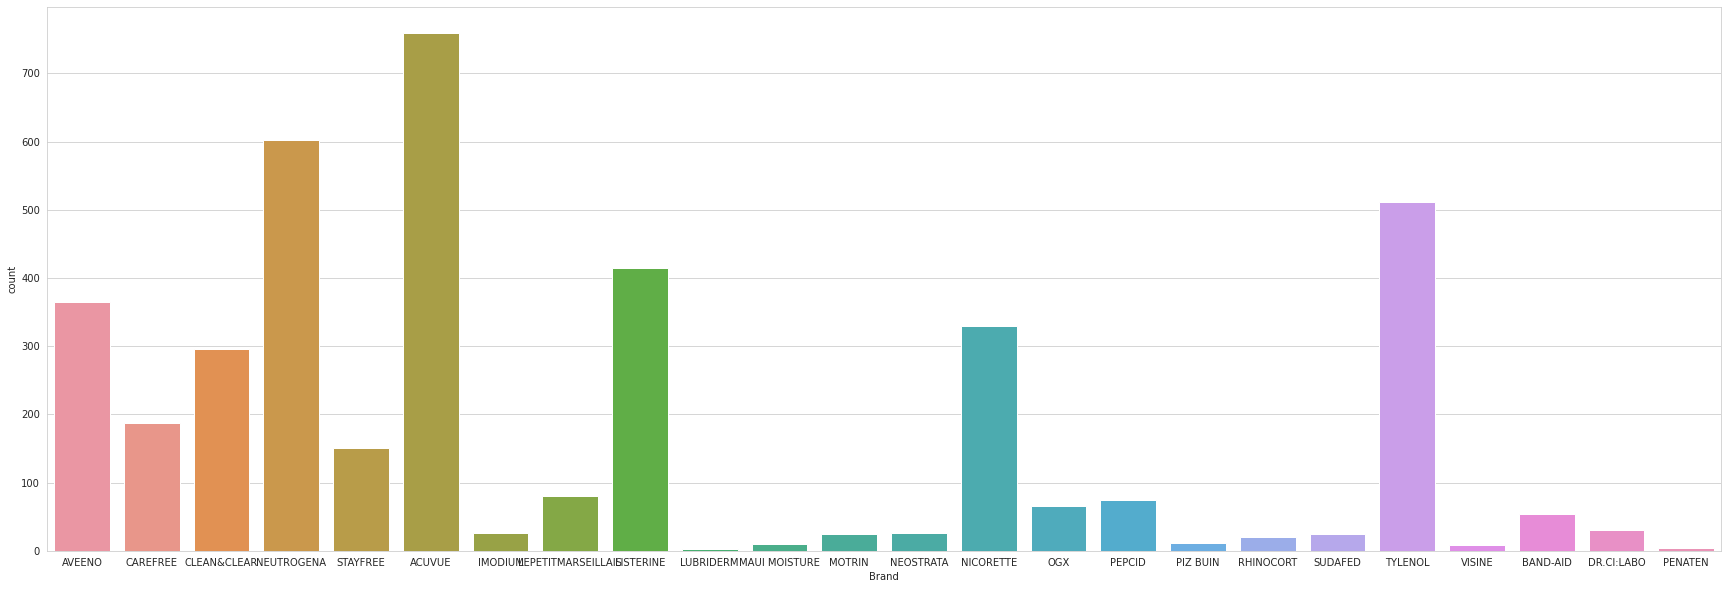

In [17]:
fig, ax = plt.subplots(figsize=(30, 10))
ax= sns.countplot(x="Brand", data=df);

## Market

In [18]:
df.Market.value_counts(dropna=False)
#Canada has the highest value counts with 572

Canada                                                 572
Australia                                              406
Hong Kong                                              328
United States of America                               318
Saudi Arabia                                           252
United Kingdom of Great Britain and Northern Island    224
Greece                                                 210
Turkey                                                 144
Mexico                                                 140
Denmark                                                132
Colombia                                               130
Indonesia                                              122
Brazil                                                 112
Poland                                                 102
Italy                                                   88
Japan                                                   86
Nordics                                                 

In [19]:
df.Market.nunique()
#There are 39 unique countries in the dataset

39

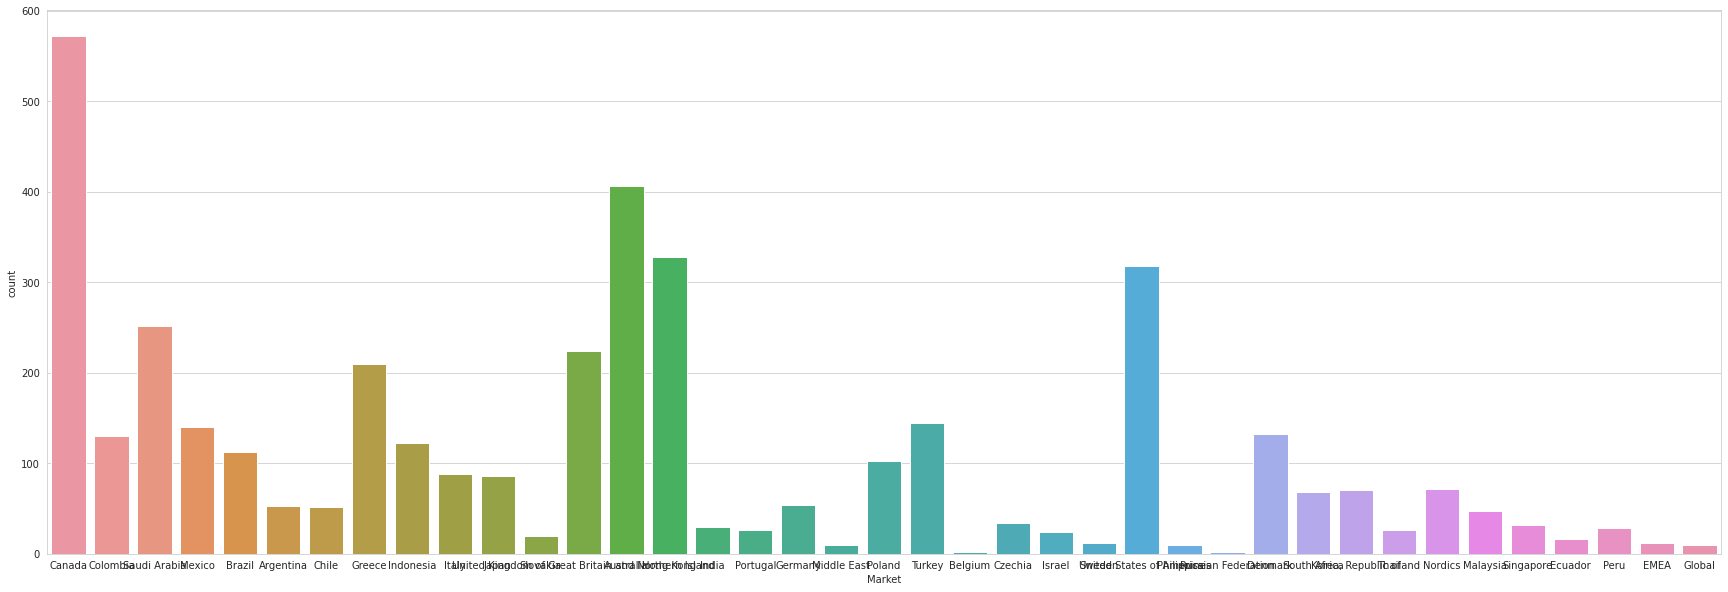

In [20]:
fig, ax = plt.subplots(figsize=(30, 10))
ax= sns.countplot(x="Market", data=df);

## Title

In [21]:
df.Title.value_counts(dropna=False)

TYLENOL® Canada Brand Channel           250
CLEAN & CLEAR® Arabia                   194
Neutrogena Australia & NZ               188
Neutrogena HongKong                     158
TYLENOLOFFICIAL                         148
youtube.com/ACUVUE GREECE               148
Rygestop med NICORETTE® Danmark         132
¡Nos pasa a todas!                      130
Nicorette AU                            114
Listerine HK                            110
ACUVUE® Contact Lenses, UK & Ireland    108
Acuvue INA                              108
Aveeno Canada                            86
semprelivrebrasil                        82
NEUTROGENA® POLSKA                       78
Johnson & Johnson Vision Türkiye         74
Acuvue Emea                              72
Aveeno Australia                         72
Tylenol Korea                            70
VisionCare Japan                         70
STAYFREE® South Africa                   68
Clean & Clear Canada                     66
Neutrogena México               

In [22]:
df.Title.nunique()
#There are 94 unique Video Titles in the dataset

94

In [26]:
# Getting rid of special characters
df["Title"]=df["Title"].astype('str').str.strip("アビーノ 公式チャンネル")

In [27]:
df["Title"].value_counts()
#Title "TYLENOL® Canada Brand Channel" (video title) has the highest value count with 250

TYLENOL® Canada Brand Channel           250
CLEAN & CLEAR® Arabia                   194
Neutrogena Australia & NZ               188
Neutrogena HongKong                     158
TYLENOLOFFICIAL                         148
youtube.com/ACUVUE GREECE               148
Rygestop med NICORETTE® Danmark         132
¡Nos pasa a todas!                      130
Nicorette AU                            114
Listerine HK                            110
ACUVUE® Contact Lenses, UK & Ireland    108
Acuvue INA                              108
Aveeno Canada                            86
semprelivrebrasil                        82
NEUTROGENA® POLSKA                       78
Johnson & Johnson Vision Türkiye         74
Acuvue Emea                              72
Aveeno Australia                         72
Tylenol Korea                            70
VisionCare Japan                         70
STAYFREE® South Africa                   68
Clean & Clear Canada                     66
Neutrogena México               

In [28]:
df.columns

Index(['Brand', 'Market', 'Title', 'Video_URL', 'Views', 'Monitoring_ID',
       'Description', 'Location', 'Comments', 'Scan_Date'],
      dtype='object')

## Video URL

In [ ]:
df["Video_URL"].value_counts(dropna=False)
#This columns just gives the URLs of videos, may not give any insights

## Views

In [30]:
df.Views.value_counts(dropna=False)
# Most repeated View count is 6 with 18

6          18
4          16
26         16
5          14
7          14
           ..
132942      1
119863      1
71324       1
424941      1
1225893     1
Name: Views, Length: 1730, dtype: int64

In [31]:
df.Views.min()

0

In [33]:
df.Views.max()

47958349

## Monitoring ID

In [ ]:
df["Monitoring_ID"].value_counts(dropna=False)
#There are 2469 Null values and and 1591 No IDM values. This columns will not give any insights since there mostly misiing values.

NaN          2469
No IDM       1591
IDM 02688      16
Name: Monitoring_ID, dtype: int64

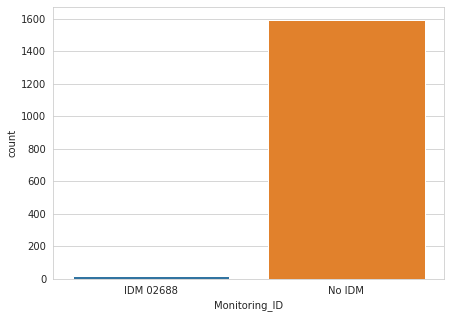

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax= sns.countplot(x="Monitoring_ID", data=df);

##'Has Description?'

In [34]:
df['Description'].value_counts(dropna=False)

Has Description        3362
Description Missing     714
Name: Description, dtype: int64

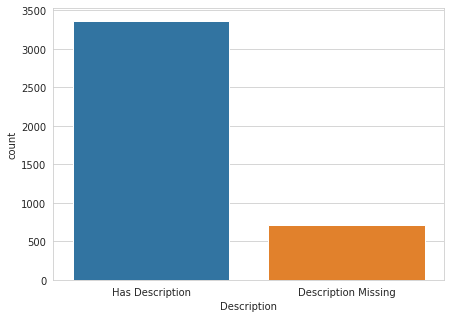

In [35]:
fig, ax = plt.subplots(figsize=(7, 5))
ax= sns.countplot(x='Description', data=df);

#'Location?'

In [36]:
df['Location'].value_counts(dropna=False)

No Location           2039
Location Specified    2037
Name: Location, dtype: int64

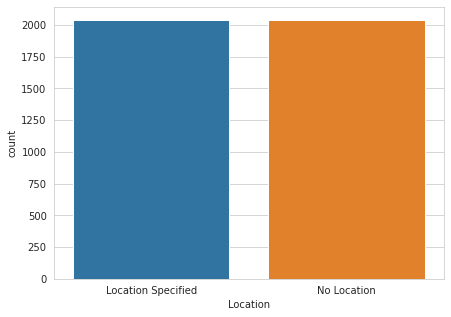

In [37]:
fig, ax = plt.subplots(figsize=(7, 5))
ax= sns.countplot(x='Location', data=df);

## 'Comments'

In [38]:
df['Comments'].value_counts(dropna=False)

Comments Disabled    2469
Comments Enabled     1607
Name: Comments, dtype: int64

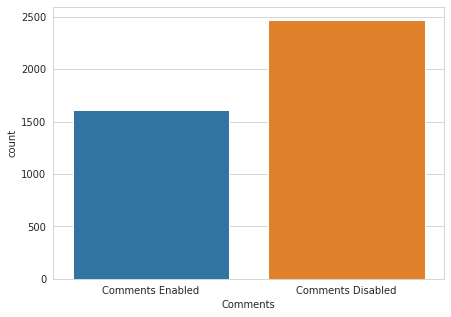

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
ax= sns.countplot(x='Comments', data=df);

## 'Scan Date'

In [39]:
df['Scan_Date'].value_counts(dropna=False)
# Data includes values from date "2021-03-05" and "2021-02-16" 

2021-03-05    2059
2021-02-16    2017
Name: Scan_Date, dtype: int64

In [40]:
df["Scan_Date"].dt.month_name()

0       February
1          March
2       February
3          March
4       February
          ...   
4071       March
4072    February
4073       March
4074    February
4075       March
Name: Scan_Date, Length: 4076, dtype: object

In [41]:
df["Scan_Month_of_2021"]=df["Scan_Date"].dt.month_name()
#I have added another columns to the data set since the data tracking is based on month

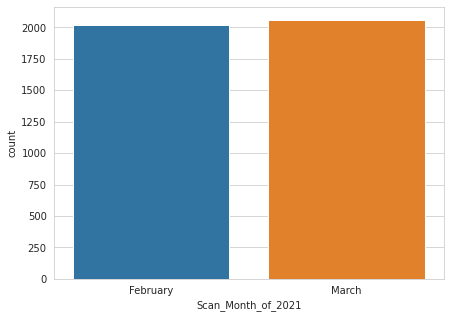

In [42]:
fig, ax = plt.subplots(figsize=(7, 5))
ax= sns.countplot(x="Scan_Month_of_2021", data=df);

In [ ]:
#df["Scan Year"]=df["Scan Date"].dt.year

In [ ]:
#df["Scan_Day"]=df["Scan Date"].dt.day

In [43]:
df

,Brand,Market,Title,Video_URL,Views,Monitoring_ID,Description,Location,Comments,Scan_Date,Scan_Month_of_2021
0,AVEENO,Canada,Aveeno Canada,youtube.com/watch?v=EaY-IoTqfWQ,22374,IDM 02688,Has Description,Location Specified,Comments Enabled,2021-02-16,February
1,AVEENO,Canada,Aveeno Canada,youtube.com/watch?v=EaY-IoTqfWQ,22374,IDM 02688,Has Description,Location Specified,Comments Enabled,2021-03-05,March
2,CAREFREE,Colombia,¡Nos pasa a todas!,youtube.com/watch?v=MUF62kJ8_p0,119973,IDM 02688,Has Description,Location Specified,Comments Enabled,2021-02-16,February
3,CAREFREE,Colombia,¡Nos pasa a todas!,youtube.com/watch?v=MUF62kJ8_p0,119973,IDM 02688,Has Description,Location Specified,Comments Enabled,2021-03-05,March
4,CLEAN&CLEAR,Canada,Clean & Clear Canada,youtube.com/watch?v=5qL9DU9SrtM,36901,IDM 02688,Has Description,No Location,Comments Enabled,2021-02-16,February
...,...,...,...,...,...,...,...,...,...,...,...
4071,TYLENOL,Mexico,Tylenol México,youtube.com/watch?v=tKIsynzmlCY,1276724,No IDM,Has Description,Location Specified,Comments Enabled,2021-03-05,March
4072,TYLENOL,Thailand,Tylenol Thailand Thailand,youtube.com/watch?v=F9pN9FfywLs,2337,No IDM,Description Missing,No Location,Comments Enabled,2021-02-16,February
4073,TYLENOL,Thailand,Tylenol Thailand Thailand,youtube.com/watch?v=F9pN9FfywLs,2337,No IDM,Description Missing,No Location,Comments Enabled,2021-03-05,March
4074,TYLENOL,Thailand,Tylenol Thailand Thailand,youtube.com/watch?v=hGhJXY_ArCI,3764551,No IDM,Has Description,No Location,Comments Enabled,2021-02-16,February


In [44]:
df.describe().T
# The range for Views differ from 0 to 47958349

,count,mean,std,min,25%,50%,75%,max
Views,4076.00,568825.21,2337659.00,0.00,396.00,3263.50,188984.00,47958349.00


## Box Plot and Distribution Plots for Views

In [45]:
df.Views.value_counts(dropna=False)

6          18
4          16
26         16
5          14
7          14
           ..
132942      1
119863      1
71324       1
424941      1
1225893     1
Name: Views, Length: 1730, dtype: int64

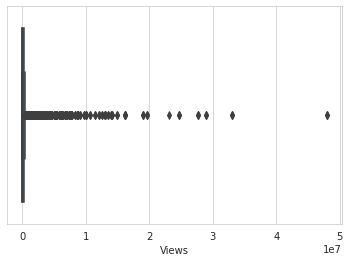

In [46]:
sns.boxplot(df.Views);
# From the boxplot it seems there are outliers but in fact this may be normal for social media interactions.

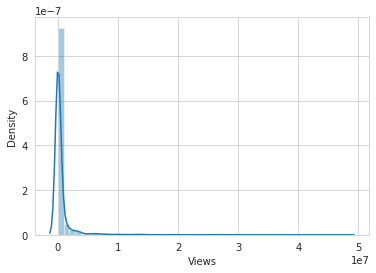

In [47]:
sns.distplot(df.Views);

#Missing Values

In [48]:
df.isnull().sum()

Brand                    0
Market                   0
Title                    0
Video_URL                0
Views                    0
Monitoring_ID         2469
Description              0
Location                 0
Comments                 0
Scan_Date                0
Scan_Month_of_2021       0
dtype: int64

In [49]:
df["Monitoring_ID"].value_counts(dropna=False)

NaN          2469
No IDM       1591
IDM 02688      16
Name: Monitoring_ID, dtype: int64

In [50]:
#Only 16 values are entered for this column, others are either Nan values or No IDM values.
#This column will not give me any insigts

In [51]:
df = df.drop("Monitoring_ID",axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Brand               4076 non-null   object        
 1   Market              4076 non-null   object        
 2   Title               4076 non-null   object        
 3   Video_URL           4076 non-null   object        
 4   Views               4076 non-null   int64         
 5   Description         4076 non-null   object        
 6   Location            4076 non-null   object        
 7   Comments            4076 non-null   object        
 8   Scan_Date           4076 non-null   datetime64[ns]
 9   Scan_Month_of_2021  4076 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 318.6+ KB


In [53]:
df.select_dtypes(include="object").describe()

,Brand,Market,Title,Video_URL,Description,Location,Comments,Scan_Month_of_2021
count,4076,4076,4076,4076,4076,4076,4076,4076
unique,24,39,94,2059,2,2,2,2
top,ACUVUE,Canada,TYLENOL® Canada Brand Channel,youtube.com/watch?v=EaY-IoTqfWQ,Has Description,No Location,Comments Disabled,March
freq,759,572,250,2,3362,2039,2469,2059


In [54]:
df.describe()

,Views
count,4076.00
mean,568825.21
std,2337659.00
min,0.00
25%,396.00
50%,3263.50
75%,188984.00
max,47958349.00


In [55]:
df[df.Views==	47958349].T
# I wanted to see the most viewed video. 

,3770,3771
Brand,NEUTROGENA,NEUTROGENA
Market,Mexico,Mexico
Title,Neutrogena México,Neutrogena México
Video_URL,youtube.com/watch?v=nnXpjA3n6kY,youtube.com/watch?v=nnXpjA3n6kY
Views,47958349,47958349
Description,Has Description,Has Description
Location,No Location,No Location
Comments,Comments Enabled,Comments Enabled
Scan_Date,2021-02-16 00:00:00,2021-03-05 00:00:00
Scan_Month_of_2021,February,March


# **GLOBAL-COUNTRY-BRAND Base Assesment**

# On a global basis-Videos without description

In [ ]:
df[df["Description"]=="Description Missing"].groupby("Scan_Month_of_2021")["Title"].value_counts()
#For the month of February and March with no description, "Neutrogena Australia & NZ" has the highest count for this dataset

Scan_Month_of_2021  Title                           
February            Neutrogena Australia & NZ           57
                    TYLENOL® Canada Brand Channel       56
                    Acuvue INA                          24
                    Johnson & Johnson Vision Türkiye    21
                    Neutrogena México                   14
                    Listerine HK                        13
                    AVEENO UK and IRELAND               11
                    Clean & Clear Malaysia              11
                    VisionCare Japan                    11
                    Rygestop med NICORETTE® Danmark     10
                    Tylenol Brasil                      10
                    Acuvue Emea                          9
                    Aveeno Australia                     9
                    Neutrogena HongKong                  9
                    ACUVUE® SK                           7
                    Aveeno Canada                        6
   

In [ ]:
df.columns

Index(['Brand', 'Market', 'Title', 'Video_URL', 'Views', 'Description',
       'Location', 'Comments', 'Scan_Date', 'Scan_Month_of_2021'],
      dtype='object')

In [ ]:
df.groupby("Scan_Month_of_2021")["Description"].value_counts()
#There are 42 more videos with descripsion in March compared to February

Scan_Month_of_2021  Description        
February            Has Description        1660
                    Description Missing     357
March               Has Description        1702
                    Description Missing     357
Name: Description, dtype: int64

# On a global basis-Videos with comments enabled

In [ ]:
df[df["Comments"]=="Comments Enabled"].groupby("Scan_Month_of_2021")["Title"].value_counts()
#For the month of February and March with comments enabled, "CLEAN & CLEAR® Arabia" has the highest count for this dataset

Scan_Month_of_2021  Title                           
February            CLEAN & CLEAR® Arabia               89
                    youtube.com/ACUVUE GREECE           73
                    ¡Nos pasa a todas!                  65
                    Aveeno Canada                       43
                    semprelivrebrasil                   41
                    Johnson & Johnson Vision Türkiye    37
                    Acuvue Emea                         36
                    Neutrogena México                   31
                    Le Petit Marseillais Arabia         29
                    Aveeno HK                           27
                    BAND-AID Brand Adhesive Bandages    27
                    LISTERINE® México                   27
                    Acuvue INA                          24
                    Pepcid Canada                       20
                    Clean & Clear Malaysia              18
                    Listerine HK                        17
   

In [ ]:
df.groupby("Scan_Month_of_2021")["Comments"].value_counts()
#There are more videos with comments enabled and comments diasbled in March compared to February

Scan_Month_of_2021  Comments         
February            Comments Disabled    1223
                    Comments Enabled      794
March               Comments Disabled    1246
                    Comments Enabled      813
Name: Comments, dtype: int64

# On a global basis-Channels without location 

In [ ]:
df[df["Location"]=="No Location"].groupby("Scan_Month_of_2021")["Title"].value_counts()
#For the month of February and March with no location, "CLEAN & CLEAR® Arabia" has the highest count for this dataset

Scan_Month_of_2021  Title                           
February            CLEAN & CLEAR® Arabia               97
                    Neutrogena Australia & NZ           94
                    Neutrogena HongKong                 79
                    youtube.com/ACUVUE GREECE           74
                    Rygestop med NICORETTE® Danmark     66
                    Nicorette AU                        57
                    NEUTROGENA® POLSKA                  39
                    Acuvue Emea                         36
                    Tylenol Korea                       35
                    VisionCare Japan                    35
                    Clean & Clear Canada                33
                    Neutrogena México                   31
                    BAND-AID Brand Adhesive Bandages    27
                    LISTERINE® México                   27
                    ACUVUE® Lentes de Contacto          25
                    Nicorette Canada                    23
   

In [ ]:
df.groupby("Scan_Month_of_2021")["Location"].value_counts()
##There are more videos with No Location and Location Specified in March compared to February

Scan_Month_of_2021  Location          
February            No Location           1015
                    Location Specified    1002
March               Location Specified    1035
                    No Location           1024
Name: Location, dtype: int64

# On a global basis -Videos with less than 100 views

In [ ]:
df[df.Views<100].groupby("Scan_Month_of_2021")["Title"].count()
##There are 13 more videos with Views less than 100 in March compared to February

Scan_Month_of_2021
February    240
March       253
Name: Title, dtype: int64

In [ ]:
df[df["Views"]<100].groupby("Scan_Month_of_2021")["Title"].value_counts()
#For the month of February and March with Views less than 100, "youtube.com/ACUVUE GREECE" has the highest count for this dataset

Scan_Month_of_2021  Title                               
February            youtube.com/ACUVUE GREECE               69
                    Acuvue Emea                             33
                    Johnson & Johnson Vision Türkiye        27
                    ACUVUE® Italia                          12
                    Acuvue INA                              12
                    LISTERINE® Canada                        9
                    Acuvue México                            8
                    Aveeno Japan                             6
                    Nicorette AU                             6
                    Rygestop med NICORETTE® Danmark          6
                    STAYFREE® South Africa                   6
                    ACUVUE® Lentes de Contacto               5
                    ACUVUE® SK                               4
                    BAND-AID Brand Adhesive Bandages         4
                    VisionCare Japan                         

# On Country Basis-Videos without description

In [ ]:
df[df["Description"]=="Description Missing"].groupby(["Scan_Month_of_2021","Market"])["Title"].value_counts()
#For the month of February and March with no description, "Australia" has the highest count for this dataset

Scan_Month_of_2021  Market                                               Title                           
February            Australia                                            Neutrogena Australia & NZ           57
                                                                         Aveeno Australia                     9
                                                                         Nicorette AU                         4
                                                                         Rhinocort Australia                  3
                    Belgium                                              LISTERINE® België                    1
                    Brazil                                               Tylenol Brasil                      10
                                                                         semprelivrebrasil                    5
                    Canada                                               TYLENOL® Canada Brand Channel       5

In [ ]:
df[df["Description"]=="Description Missing"].groupby(["Scan_Month_of_2021","Market"])["Title"].count()

Scan_Month_of_2021  Market                                             
February            Australia                                              73
                    Belgium                                                 1
                    Brazil                                                 15
                    Canada                                                 72
                    Colombia                                                2
                    Denmark                                                10
                    Ecuador                                                 3
                    Global                                                  2
                    Greece                                                  1
                    Hong Kong                                              23
                    Indonesia                                              25
                    Israel                                            

# On Country Basis-Videos with comments enabled

In [ ]:
df[df["Comments"]=="Comments Enabled"].groupby(["Scan_Month_of_2021","Market"])["Title"].value_counts()
#For the month of February and March with no description, "Saudi Arabia" has the highest count for this dataset

Scan_Month_of_2021  Market                    Title                           
February            Argentina                 Carefree® Argentina                 10
                                              Aveno                                2
                    Brazil                    semprelivrebrasil                   41
                                              Tylenol Brasil                      12
                                              OGX Beauty Brasil                    3
                    Canada                    Aveeno Canada                       43
                                              Pepcid Canada                       20
                                              Nicorette Canada                    16
                                              Clean & Clear Canada                13
                                              Carefree Canada                     10
                                              NEOSTRATA Canada         

# On Country Basis-Channels without location

In [ ]:
df[df["Location"]=="No Location"].groupby(["Scan_Month_of_2021","Market"])["Title"].value_counts()
#For the month of February and March with no location, "Australia" has the highest count for this dataset

Scan_Month_of_2021  Market                                               Title                           
February            Argentina                                            Aveno                                2
                    Australia                                            Neutrogena Australia & NZ           94
                                                                         Nicorette AU                        57
                                                                         Rhinocort Australia                  3
                    Belgium                                              LISTERINE® België                    1
                    Brazil                                               Tylenol Brasil                      12
                                                                         OGX Beauty Brasil                    3
                    Canada                                               Clean & Clear Canada                3

In [ ]:
df[df["Location"]=="No Location"].groupby(["Scan_Month_of_2021","Market"])["Title"].count()

Scan_Month_of_2021  Market                                             
February            Argentina                                                2
                    Australia                                              154
                    Belgium                                                  1
                    Brazil                                                  15
                    Canada                                                  56
                    Chile                                                   25
                    Czechia                                                  2
                    Denmark                                                 66
                    EMEA                                                     6
                    Global                                                   5
                    Greece                                                 105
                    Hong Kong                              

# On Country Basis- Videos with less than 100

In [ ]:
df[df["Views"]<100].groupby(["Scan_Month_of_2021","Market"])["Title"].value_counts()
#For the month of February and March with views less than 100, "Greece" has the highest count for this dataset

Scan_Month_of_2021  Market                                               Title                               
February            Australia                                            Nicorette AU                             6
                                                                         Neutrogena Australia & NZ                2
                    Brazil                                               Tylenol Brasil                           2
                    Canada                                               LISTERINE® Canada                        9
                                                                         Carefree Canada                          2
                                                                         TYLENOL® Canada Brand Channel            2
                                                                         Aveeno Canada                            1
                                                                         Nicor

In [ ]:
df[df["Views"]<100].groupby(["Scan_Month_of_2021","Market"])["Title"].count()

Scan_Month_of_2021  Market                                             
February            Australia                                               8
                    Brazil                                                  2
                    Canada                                                 15
                    Chile                                                   5
                    Denmark                                                 6
                    Ecuador                                                 1
                    Greece                                                 70
                    Indonesia                                              13
                    Italy                                                  13
                    Japan                                                  10
                    Malaysia                                                1
                    Mexico                                            

# On Brand Basis-Videos without description

In [ ]:
df[df["Description"]=="Description Missing"].groupby(["Scan_Month_of_2021","Brand"])["Title"].value_counts()
#For the month of February and March with no description, "NOUTROGENA" has the highest count for this dataset

Scan_Month_of_2021  Brand               Title                           
February            ACUVUE              Acuvue INA                          24
                                        Johnson & Johnson Vision Türkiye    21
                                        VisionCare Japan                    11
                                        Acuvue Emea                          9
                                        ACUVUE® SK                           7
                    AVEENO              AVEENO UK and IRELAND               11
                                        Aveeno Australia                     9
                                        Aveeno Canada                        6
                                        Aveeno HK                            1
                    BAND-AID            BAND-AID Brand Adhesive Bandages     3
                    CAREFREE            ¡Nos pasa a todas!                   2
                    CLEAN&CLEAR         Clean & Clear Mala

In [ ]:
df[df["Description"]=="Description Missing"].groupby(["Scan_Month_of_2021","Brand"])["Title"].count()

Scan_Month_of_2021  Brand             
February            ACUVUE                72
                    AVEENO                27
                    BAND-AID               3
                    CAREFREE               2
                    CLEAN&CLEAR           16
                    DR.CI:LABO             1
                    IMODIUM                1
                    LEPETITMARSEILLAIS     5
                    LISTERINE             39
                    NEUTROGENA            86
                    NICORETTE             14
                    OGX                    2
                    PEPCID                 4
                    PIZ BUIN               3
                    RHINOCORT              3
                    STAYFREE               7
                    TYLENOL               72
March               ACUVUE                72
                    AVEENO                27
                    BAND-AID               3
                    CAREFREE               2
                

# On Brand Basis-Videos with comments enabled

In [ ]:
df[df["Comments"]=="Comments Enabled"].groupby(["Scan_Month_of_2021","Brand"])["Title"].value_counts()
#For the month of February and March with no comments enabled, "ACUVUE" has the highest count for this dataset

Scan_Month_of_2021  Brand               Title                           
February            ACUVUE              youtube.com/ACUVUE GREECE           73
                                        Johnson & Johnson Vision Türkiye    37
                                        Acuvue Emea                         36
                                        Acuvue INA                          24
                                        Acuvue México                       11
                    AVEENO              Aveeno Canada                       43
                                        Aveeno HK                           27
                                        Aveeno India                        14
                                        Aveeno Japan                         8
                                        Aveeno ME                            4
                                        Aveeno Thailand                      4
                                        Aveeno Indonesia  

In [ ]:
df[df["Comments"]=="Comments Enabled"].groupby(["Scan_Month_of_2021","Brand"])["Title"].count()

Scan_Month_of_2021  Brand             
February            ACUVUE                181
                    AVEENO                106
                    BAND-AID               27
                    CAREFREE               85
                    CLEAN&CLEAR           120
                    DR.CI:LABO             15
                    LEPETITMARSEILLAIS     30
                    LISTERINE              57
                    NEOSTRATA               3
                    NEUTROGENA             46
                    NICORETTE              16
                    OGX                    25
                    PEPCID                 20
                    PIZ BUIN                5
                    STAYFREE               41
                    TYLENOL                17
March               ACUVUE                187
                    AVEENO                115
                    BAND-AID               27
                    CAREFREE               85
                    CLEAN&CLEAR          

# On Brand Basis-Channels without location

In [ ]:
df[df["Location"]=="No Location"].groupby(["Scan_Month_of_2021","Brand"])["Title"].value_counts()
#For the month of February and March with no location, "NOUTROGENA" has the highest count for this dataset

Scan_Month_of_2021  Brand        Title                           
February            ACUVUE       youtube.com/ACUVUE GREECE           74
                                 Acuvue Emea                         36
                                 VisionCare Japan                    35
                                 ACUVUE® Lentes de Contacto          25
                                 ACUVUE® SK                          10
                    AVEENO       Aveeno India                        15
                                 Aveeno Indonesia                     3
                                 Aveeno Portugal                      2
                                 Aveno                                2
                    BAND-AID     BAND-AID Brand Adhesive Bandages    27
                    CLEAN&CLEAR  CLEAN & CLEAR® Arabia               97
                                 Clean & Clear Canada                33
                                 Clean & Clear Malaysia              1

In [ ]:
df[df["Location"]=="No Location"].groupby(["Scan_Month_of_2021","Brand"])["Title"].count()

Scan_Month_of_2021  Brand      
February            ACUVUE         180
                    AVEENO          22
                    BAND-AID        27
                    CLEAN&CLEAR    148
                    DR.CI:LABO      15
                    IMODIUM          1
                    LISTERINE       64
                    LUBRIDERM        1
                    MOTRIN          12
                    NEOSTRATA        1
                    NEUTROGENA     272
                    NICORETTE      165
                    OGX             10
                    PEPCID          17
                    PIZ BUIN         5
                    RHINOCORT        3
                    SUDAFED         12
                    TYLENOL         56
                    VISINE           4
March               ACUVUE         180
                    AVEENO          31
                    BAND-AID        27
                    CLEAN&CLEAR    148
                    DR.CI:LABO      15
                    IMODIUM     

# On Brand Basis-Videos with less than 100 views

In [ ]:
df[df["Views"]<100].groupby(["Scan_Month_of_2021","Brand"])["Title"].value_counts()
#For the month of February and March with views less than 100, "ACUVUE" has the highest count for this dataset

Scan_Month_of_2021  Brand       Title                               
February            ACUVUE      youtube.com/ACUVUE GREECE               69
                                Acuvue Emea                             33
                                Johnson & Johnson Vision Türkiye        27
                                ACUVUE® Italia                          12
                                Acuvue INA                              12
                                Acuvue México                            8
                                ACUVUE® Lentes de Contacto               5
                                ACUVUE® SK                               4
                                VisionCare Japan                         4
                                ACUVUE® Contact Lenses, UK & Ireland     1
                    AVEENO      Aveeno Japan                             6
                                Aveeno Portugal                          2
                               

In [ ]:
df[df["Views"]<100].groupby(["Scan_Month_of_2021","Brand"])["Title"].count()

Scan_Month_of_2021  Brand     
February            ACUVUE        175
                    AVEENO         11
                    BAND-AID        4
                    CAREFREE        2
                    IMODIUM         3
                    LISTERINE      14
                    NEOSTRATA       1
                    NEUTROGENA      4
                    NICORETTE      13
                    PEPCID          2
                    STAYFREE        6
                    SUDAFED         1
                    TYLENOL         4
March               ACUVUE        187
                    AVEENO         12
                    BAND-AID        4
                    CAREFREE        2
                    IMODIUM         3
                    LISTERINE      14
                    NEOSTRATA       1
                    NEUTROGENA      4
                    NICORETTE      13
                    PEPCID          2
                    STAYFREE        6
                    SUDAFED         1
                   

#Saving Final Data

In [ ]:
df.to_csv("YouTubeData_EDA.csv", index=False)